# Taller Pandas Data Frame
---------------------

### NumPy:
* Low Level Data Structure (np.array)
* Suport large multi-dimensional array and matrices
* Soporte a muchas operaciones matematicas </q>

### Pandas:
* Structuras de datos de alto nivel (DataFrames)
* Opreraciones de agregacion, merge and join
* Manejo de Series

![title](ThePythonStack.png)

In [104]:
#from IPython.display import IFrame
#IFrame("Pandas_Cheat_Sheet.pdf", width=900, height=800)

-----------------------
### Importamos las librerias para trabajar

In [276]:
import numpy as np
import pandas as pd

## Empezando con Array y Series

In [106]:
l1 = [1,2,3]

In [107]:
type(l1)

list

In [108]:
l1 = [1,2,3]
l2 = [2,3,4]
l1 + l2

[1, 2, 3, 2, 3, 4]

In [109]:
miarray = np.array([
                    [1,2,3,5,7],
                    [4,3,2,1,0],
                    [12,43,32,54,98]
                   ])
miarray.shape

(3, 5)

In [110]:
miarray.size

15

In [111]:
miarray + miarray

array([[  2,   4,   6,  10,  14],
       [  8,   6,   4,   2,   0],
       [ 24,  86,  64, 108, 196]])

In [112]:
miarray[0:-1:1,0:-2]

array([[1, 2, 3],
       [4, 3, 2]])

In [113]:
#miserie = pd.Series([1,2,3], index = ['a', 'b', 'c'])
miserie = pd.Series([1,2,3])
#miserie.isin(['1'])

In [114]:
miserie[0:3]

0    1
1    2
2    3
dtype: int64

In [115]:
miserie + miserie

0    2
1    4
2    6
dtype: int64

In [116]:
a1 = np.array([1,2,3])
a2 = np.array([1,2,3])


In [117]:
l2 + a1

array([3, 5, 7])

## Construccion de Data Frames

In [118]:
[['a',1,'&'], ['b',2,'/'], ['c',3,'@']]

[['a', 1, '&'], ['b', 2, '/'], ['c', 3, '@']]

In [41]:
#df = pd.DataFrame([['a',1,'&'], ['b',2,'/'], ['c',3,'@']], columns = ['Col1', 'Col2', 'Col3'], index = ['K1', 'K2', 'K3'])
df = pd.DataFrame([
                    [1,2,3,5,7],
                    [4,3,2,1,0],
                    [12,43,32,54,98]
                   ])
df

,0,1,2,3,4
0,1,2,3,5,7
1,4,3,2,1,0
2,12,43,32,54,98


### Contruccioon con diccionario

In [43]:
d = { 'Col1': ['a', 'b', 'c'], 
      'Col2': [1, 2, 3], 
      'Col3' : ['1971/01/01', '2000/08/25', '2019/05/2']
    }
d

{'Col1': ['a', 'b', 'c'],
 'Col2': [1, 2, 3],
 'Col3': ['1971/01/01', '2000/08/25', '2019/05/2']}

In [44]:
#df = pd.DataFrame(d, index = ['I1', 'I2', 'I3'])
df = pd.DataFrame(d)
df

,Col1,Col2,Col3
0,a,1,1971/01/01
1,b,2,2000/08/25
2,c,3,2019/05/2


In [45]:
df.dtypes

Col1    object
Col2     int64
Col3    object
dtype: object

In [46]:
pd.to_datetime(df.Col3)

0   1971-01-01
1   2000-08-25
2   2019-05-02
Name: Col3, dtype: datetime64[ns]

In [47]:
df.Col3 = pd.to_datetime(df.Col3)

In [125]:
df.dtypes

Col1            object
Col2             int64
Col3    datetime64[ns]
dtype: object

In [126]:
df

,Col1,Col2,Col3
0,a,1,1971-01-01
1,b,2,2000-08-25
2,c,3,2019-05-02


### Leyendo de Archivos

In [129]:
!type data\Personas.csv

CI,Nombre,Sexo,Telefono,FNac
35874773, Rafael Harispe, M, 09552992, 1971/02/05


In [131]:
dfPersonas = pd.read_csv('data/Personas.csv', parse_dates = ['FNac'])
#dfPersonas = pd.read_csv('Personas.csv', sep = ',', )
dfPersonas

,CI,Nombre,Sexo,Telefono,FNac
0,35874773,Rafael Harispe,M,9552992,1971-02-05


In [132]:
dfPersonas

,CI,Nombre,Sexo,Telefono,FNac
0,35874773,Rafael Harispe,M,9552992,1971-02-05


In [134]:
!type data\MasPersonas.csv

CI,Nombre,Sexo,Telefono,FNac
17477171,Silvana Collazo,F,00000000,1980/01/01
35874773,Rafael Harispe,M,09552992,1971/02/05
1231233,,,099998898,


In [135]:
dfMasPersonas = pd.read_csv('data/MasPersonas.csv', parse_dates = ['FNac'])
dfMasPersonas

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01
1,35874773,Rafael Harispe,M,9552992,1971-02-05
2,1231233,NaN,NaN,99998898,NaT


In [136]:
dfAll = pd.concat([dfPersonas, dfMasPersonas])

In [137]:
dfAll.set_index('CI')

,Nombre,Sexo,Telefono,FNac
CI,,,,
35874773,Rafael Harispe,M,9552992,1971-02-05
17477171,Silvana Collazo,F,0,1980-01-01
35874773,Rafael Harispe,M,9552992,1971-02-05
1231233,NaN,NaN,99998898,NaT


## Leyendo de Excel

In [139]:
pd.read_clipboard()

,NroSiniestro,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago
0,102030,35874773,15/1/2019,M,150000,150000
1,453242,17477171,3/7/2019,R,10000,500
2,123123,35874773,15/1/2019,M,150000,150001


In [140]:
dfP = pd.read_excel('data/Personas.xlsx', sheet_name = 'Hoja1')
dfP

,Nombre,Apellido,Direccion,Telefono
0,Rafael,Harispe,Verdi 4622,95529992


In [141]:
dfAll.to_clipboard(sep = ';')

## Explorando el Data Frame

In [17]:
import pandas as pd

movies = pd.read_csv('http://bit.ly/imdbratings')
movies.tail(4)

,star_rating,title,content_rating,genre,duration,actors_list
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."
978,7.4,Wall Street,R,Crime,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar..."


In [5]:
# Tipos de datos de las columnas
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [285]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [294]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [300]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [295]:
movies.genre.value_counts(normalize = True) * 100

Drama        28.396323
Comedy       15.934627
Action       13.891726
Crime        12.665986
Biography     7.865169
Adventure     7.660878
Animation     6.332993
Horror        2.962206
Mystery       1.634321
Western       0.919305
Thriller      0.510725
Sci-Fi        0.510725
Film-Noir     0.306435
Family        0.204290
Fantasy       0.102145
History       0.102145
Name: genre, dtype: float64

In [14]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [307]:
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [21]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [34]:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [308]:
movies.index

RangeIndex(start=0, stop=979, step=1)

In [24]:
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [39]:
movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


## Pandas Profiling

In [152]:
!pip install pandas-profiling

In [25]:
import pandas_profiling

In [309]:
pandas_profiling.ProfileReport(movies).to_file(output_file="output.html")

In [155]:
# Para explorer
#from IPython.core.display import display, HTML
#display(HTML(report.to_html()))

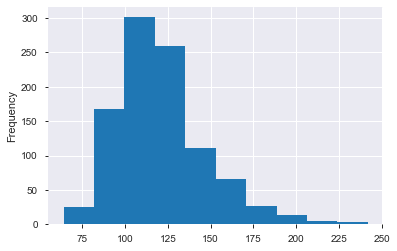

In [156]:
%matplotlib inline
movies.duration.plot(kind = 'hist')

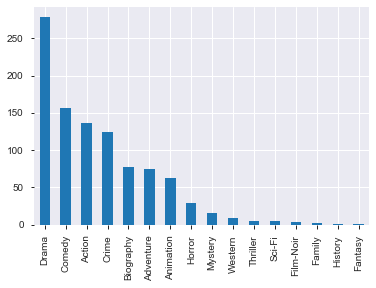

In [157]:
movies.genre.value_counts().plot(kind = 'bar')

## Accesando Data Frame

### Operador []

In [49]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [327]:
## Operador de acceso [] con lista de strings, espera una lista de columnas
movies[1:20:3]

,level_0,df_index,genre,star_rating,title,content_rating,duration,actors_list
1,1,1,Crime,9.2,The Godfather,R,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
4,4,4,Crime,8.9,Pulp Fiction,R,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
7,7,7,Adventure,8.9,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
10,10,10,Adventure,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
13,13,13,Drama,8.8,Forrest Gump,PG-13,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"
16,16,16,Drama,8.7,One Flew Over the Cuckoo's Nest,R,133,"[u'Jack Nicholson', u'Louise Fletcher', u'Mich..."
19,19,19,Action,8.7,Star Wars,PG,121,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."


In [58]:
movies.index

RangeIndex(start=0, stop=979, step=1)

In [76]:
movies[5::-2]

,star_rating,title,content_rating,genre,duration,actors_list
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"


In [ ]:
## Opoerador de acceso [] con sintaxis ::
## Espera indices de filas desde:hasta:salto
movies.set_index('title', inplace = True)

In [84]:
movies.head()

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
The Shawshank Redemption,9.3,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
The Godfather,9.2,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
The Godfather: Part II,9.1,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
The Dark Knight,9.0,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Pulp Fiction,8.9,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [345]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [358]:
movies.loc[1:3,'genre':'actors_list']

,genre,duration,actors_list
1,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [350]:
mv2 = movies.loc[1:3,'genre':'actors_list']

In [351]:
mv2

,genre,duration,actors_list
1,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [360]:
sDF = movies.tail(4)
sDF

,star_rating,title,content_rating,genre,duration,actors_list
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."
978,7.4,Wall Street,R,Crime,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar..."


In [364]:
type(arr)

numpy.ndarray

In [363]:
arr = np.array([True, False, False, True])
sDF[arr]

,star_rating,title,content_rating,genre,duration,actors_list
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
978,7.4,Wall Street,R,Crime,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar..."


In [366]:
movies.star_rating == 7.4

979

In [393]:
mask = (movies.content_rating == 'R') | (~movies.star_rating < 7.4)

In [392]:
movies[mask]

,star_rating,title,content_rating,genre,duration,actors_list
930,7.4,Man on the Moon,R,Biography,118,"[u'Jim Carrey', u'Danny DeVito', u'Gerry Becker']"
931,7.4,Mean Streets,R,Crime,112,"[u'Robert De Niro', u'Harvey Keitel', u'David ..."
935,7.4,Excalibur,R,Adventure,140,"[u'Nigel Terry', u'Helen Mirren', u'Nicholas C..."
939,7.4,Predestination,R,Drama,97,"[u'Ethan Hawke', u'Sarah Snook', u'Noah Taylor']"
944,7.4,Terms of Endearment,R,Comedy,132,"[u'Shirley MacLaine', u'Debra Winger', u'Jack ..."
945,7.4,Take Shelter,R,Drama,120,"[u'Michael Shannon', u'Jessica Chastain', u'Sh..."
948,7.4,Frances Ha,R,Comedy,86,"[u'Greta Gerwig', u'Mickey Sumner', u'Adam Dri..."
950,7.4,Bound,R,Crime,108,"[u'Jennifer Tilly', u'Gina Gershon', u'Joe Pan..."
951,7.4,Sleepy Hollow,R,Drama,105,"[u'Johnny Depp', u'Christina Ricci', u'Miranda..."
952,7.4,Pirate Radio,R,Comedy,117,"[u'Philip Seymour Hoffman', u'Bill Nighy', u'N..."


In [384]:
type(movies.star_rating.isin([7.4, 7.2]))

pandas.core.series.Series

In [404]:
movies.actors_list.str.contains('Charlie')

0      False
1      False
2      False
3      False
4      False
       ...  
974    False
975    False
976    False
977    False
978     True
Name: actors_list, Length: 979, dtype: bool

In [396]:
movies[movies.star_rating.isin([7.4, 7.2])]

,star_rating,title,content_rating,genre,duration,actors_list
930,7.4,Man on the Moon,R,Biography,118,"[u'Jim Carrey', u'Danny DeVito', u'Gerry Becker']"
931,7.4,Mean Streets,R,Crime,112,"[u'Robert De Niro', u'Harvey Keitel', u'David ..."
932,7.4,Harry Potter and the Order of the Phoenix,PG-13,Adventure,138,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
933,7.4,Beetlejuice,PG,Comedy,92,"[u'Alec Baldwin', u'Geena Davis', u'Michael Ke..."
934,7.4,"Crazy, Stupid, Love.",PG-13,Comedy,118,"[u'Steve Carell', u'Ryan Gosling', u'Julianne ..."
935,7.4,Excalibur,R,Adventure,140,"[u'Nigel Terry', u'Helen Mirren', u'Nicholas C..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
937,7.4,Labyrinth,PG,Adventure,101,"[u'David Bowie', u'Jennifer Connelly', u'Toby ..."
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
939,7.4,Predestination,R,Drama,97,"[u'Ethan Hawke', u'Sarah Snook', u'Noah Taylor']"


In [372]:
mask

0      False
1      False
2      False
3      False
4      False
       ...  
974     True
975     True
976     True
977     True
978     True
Name: star_rating, Length: 979, dtype: bool

In [368]:
mask.count()

979

In [379]:
movies.loc[[1,2], ['title','genre']]

,title,genre
1,The Godfather,Crime
2,The Godfather: Part II,Crime


#### Trabajando con loc

In [136]:
movies.set_index('genre', inplace = True)

In [138]:
movies.loc[::-1, 'star_rating':'duration'].head()

,star_rating,title,content_rating,duration
genre,,,,
Crime,7.4,Wall Street,R,126
Horror,7.4,Poltergeist,PG,114
Action,7.4,Master and Commander: The Far Side of the World,PG-13,138
Adventure,7.4,Back to the Future Part III,PG,118
Comedy,7.4,Tootsie,PG,116


In [148]:
#movies.loc[['Crime','Adventure'], 'star_rating':'duration']
movies.loc['Crime', 'star_rating':'duration']

,star_rating,title,content_rating,duration
genre,,,,
Crime,9.3,The Shawshank Redemption,R,142
Crime,9.2,The Godfather,R,175
Crime,9.1,The Godfather: Part II,R,200
Crime,8.9,Pulp Fiction,R,154
Crime,8.7,City of God,R,130
...,...,...,...,...
Crime,7.5,Brick,R,110
Crime,7.4,Mean Streets,R,112
Crime,7.4,Bound,R,108


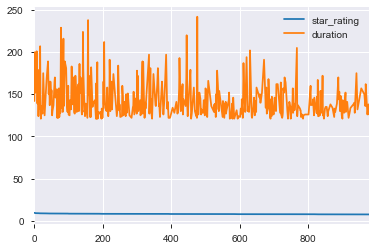

In [416]:
movies.loc[movies.duration > 120,['star_rating','duration']].plot()

In [405]:
#movies.reset_index(inplace = True)
movies[movies.genre.isin(['Crime', 'Adventure'])]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
...,...,...,...,...,...,...
950,7.4,Bound,R,Crime,108,"[u'Jennifer Tilly', u'Gina Gershon', u'Joe Pan..."
953,7.4,The NeverEnding Story,PG,Adventure,102,"[u'Noah Hathaway', u'Barret Oliver', u'Tami St..."
969,7.4,Law Abiding Citizen,R,Crime,109,"[u'Gerard Butler', u'Jamie Foxx', u'Leslie Bibb']"
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."


### Trabajando con iloc

In [198]:
df.iloc[[0,2] , [0, 2]]

,Col1,Col3
0,a,1971-01-01
2,c,2019-05-02


----------------------------
## lambda, map, filter, reduce, apply

### Apply

In [18]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [20]:
# Apply, aplica una funcion a cada elmento de la seire y a cada columna o fila del DF
def f(x):
    return x * 2

movies.duration.apply(f)

0      284
1      350
2      400
3      304
4      308
      ... 
974    232
975    236
976    276
977    228
978    252
Name: duration, Length: 979, dtype: int64

In [21]:
max = lambda x,y: x if x > y else y

In [23]:
doble = lambda x: x * 2

In [25]:
doble(5)

10

In [26]:
movies.duration.apply(doble)

0      284
1      350
2      400
3      304
4      308
      ... 
974    232
975    236
976    276
977    228
978    252
Name: duration, Length: 979, dtype: int64

In [27]:
movies.duration.apply(lambda x: x * 2)

0      284
1      350
2      400
3      304
4      308
      ... 
974    232
975    236
976    276
977    228
978    252
Name: duration, Length: 979, dtype: int64

In [29]:
movies.title.apply(lambda s:s.split(' '))

0                           [The, Shawshank, Redemption]
1                                       [The, Godfather]
2                            [The, Godfather:, Part, II]
3                                    [The, Dark, Knight]
4                                        [Pulp, Fiction]
                             ...                        
974                                            [Tootsie]
975                   [Back, to, the, Future, Part, III]
976    [Master, and, Commander:, The, Far, Side, of, ...
977                                        [Poltergeist]
978                                       [Wall, Street]
Name: title, Length: 979, dtype: object

### Map

In [30]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [31]:
movies.genre.map({'Crime':'Hay!', 'Action':'Accion', 'Animation':'A', 'Drama':'DR'})

0        Hay!
1        Hay!
2        Hay!
3      Accion
4        Hay!
        ...  
974       NaN
975       NaN
976    Accion
977       NaN
978      Hay!
Name: genre, Length: 979, dtype: object

In [32]:
"El Genero es {} {} {}".format(1, 'a', 'asd')

'El Genero es 1 a asd'

In [33]:
movies.genre.map("El genero es {}".format)

0          El genero es Crime
1          El genero es Crime
2          El genero es Crime
3         El genero es Action
4          El genero es Crime
                ...          
974       El genero es Comedy
975    El genero es Adventure
976       El genero es Action
977       El genero es Horror
978        El genero es Crime
Name: genre, Length: 979, dtype: object

In [490]:
def mapeo(x):
    if x == 'Crime':
        return 'Es de Crimen'
    else:
        return 'No es de Crimen'

movies.genre[0:10].map(mapeo)

0       Es de Crimen
1       Es de Crimen
2       Es de Crimen
3    No es de Crimen
4       Es de Crimen
5    No es de Crimen
6    No es de Crimen
7    No es de Crimen
8    No es de Crimen
9    No es de Crimen
Name: genre, dtype: object

In [45]:
movies[['star_rating', 'duration']].apply(sum)

star_rating      7724.1
duration       118439.0
dtype: float64

In [34]:
def mapeoFila(x):
    if x.genre == 'Crime' and x.content_rating == 'R':
        return 'No la ves'
    else:
        return 'Hace lo que quieras'

movies.apply(mapeoFila, axis = 1)

0                No la ves
1                No la ves
2                No la ves
3      Hace lo que quieras
4                No la ves
              ...         
974    Hace lo que quieras
975    Hace lo que quieras
976    Hace lo que quieras
977    Hace lo que quieras
978              No la ves
Length: 979, dtype: object

In [492]:
movies.apply(lambda x: 'No la ves' if (x.genre == 'Crime' and x.content_rating == 'R') else 'Hace lo que quieras', axis = 1)

0                No la ves
1                No la ves
2                No la ves
3      Hace lo que quieras
4                No la ves
              ...         
974    Hace lo que quieras
975    Hace lo que quieras
976    Hace lo que quieras
977    Hace lo que quieras
978              No la ves
Length: 979, dtype: object

In [493]:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [494]:
movies.apply(lambda x: "La pelicula {} es de {} y calificada {}".format(x.title, x.genre, x.content_rating) , axis = 1)

0      La pelicula The Shawshank Redemption es de Cri...
1      La pelicula The Godfather es de Crime y califi...
2      La pelicula The Godfather: Part II es de Crime...
3      La pelicula The Dark Knight es de Action y cal...
4      La pelicula Pulp Fiction es de Crime y calific...
                             ...                        
974     La pelicula Tootsie es de Comedy y calificada PG
975    La pelicula Back to the Future Part III es de ...
976    La pelicula Master and Commander: The Far Side...
977    La pelicula Poltergeist es de Horror y calific...
978    La pelicula Wall Street es de Crime y califica...
Length: 979, dtype: object

In [495]:
movies.title.apply("La pelicula es {}".format) + movies.genre.apply(" como para {}".format)

0      La pelicula es The Shawshank Redemption como p...
1           La pelicula es The Godfather como para Crime
2      La pelicula es The Godfather: Part II como par...
3        La pelicula es The Dark Knight como para Action
4            La pelicula es Pulp Fiction como para Crime
                             ...                        
974              La pelicula es Tootsie como para Comedy
975    La pelicula es Back to the Future Part III com...
976    La pelicula es Master and Commander: The Far S...
977          La pelicula es Poltergeist como para Horror
978           La pelicula es Wall Street como para Crime
Length: 979, dtype: object

## Llenar datos faltantes

In [496]:
dfFNA = pd.read_csv('data/MasPersonas.csv', parse_dates = ['FNac'])
dfFNA

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01
1,35874773,Rafael Harispe,M,9552992,1971-02-05
2,1231233,NaN,NaN,99998898,NaT


In [497]:
dfFNA.fillna({ 'Nombre':'notiene@notiene', 'Sexo':'?', 'FNac': np.datetime64('1970-01-01')})

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01
1,35874773,Rafael Harispe,M,9552992,1971-02-05
2,1231233,notiene@notiene,?,99998898,1970-01-01


In [498]:
dfFNA.fillna({ 'Nombre':'notiene@notiene', 'Sexo':'?', 'FNac': dfFNA.FNac.min()})

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01
1,35874773,Rafael Harispe,M,9552992,1971-02-05
2,1231233,notiene@notiene,?,99998898,1971-02-05


In [499]:
dfFNA.fillna({'Nombre':lambda x:print(x)})

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01
1,35874773,Rafael Harispe,M,9552992,1971-02-05
2,1231233,<function <lambda> at 0x000002BD0915E3A8>,NaN,99998898,NaT


In [500]:
dfFNA.fillna(method = 'ffill')

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01
1,35874773,Rafael Harispe,M,9552992,1971-02-05
2,1231233,Rafael Harispe,M,99998898,1971-02-05


In [501]:
dfFNA.interpolate()

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01
1,35874773,Rafael Harispe,M,9552992,1971-02-05
2,1231233,NaN,NaN,99998898,NaT


In [502]:
dfFNA.dropna(how ='any')

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01
1,35874773,Rafael Harispe,M,9552992,1971-02-05


In [503]:
s = pd.Series([1,2,np.nan,4])
s

0    1.0
1    2.0
2    NaN
3    4.0
dtype: float64

In [504]:
s.interpolate()

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

## Extras

In [505]:
rows, cols = df.shape

In [506]:
rows,cols

(3, 3)

In [507]:
df.head()
df.tail(2)

,Col1,Col2,Col3
1,b,2,2000-08-25
2,c,3,2019-05-02


In [508]:
df.columns

Index(['Col1', 'Col2', 'Col3'], dtype='object')

In [509]:
df.values

array([['a', 1, Timestamp('1971-01-01 00:00:00')],
       ['b', 2, Timestamp('2000-08-25 00:00:00')],
       ['c', 3, Timestamp('2019-05-02 00:00:00')]], dtype=object)

In [510]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [511]:
df.describe()

,Col2
count,3.0
mean,2.0
std,1.0
min,1.0
25%,1.5
50%,2.0
75%,2.5
max,3.0


In [512]:
df.dtypes

Col1            object
Col2             int64
Col3    datetime64[ns]
dtype: object

In [513]:
df.sort_values('Col3', ascending = False)

,Col1,Col2,Col3
2,c,3,2019-05-02
1,b,2,2000-08-25
0,a,1,1971-01-01


In [514]:
## Renombrando Columnas
df.rename(columns = {'Col1':'Columna1', 'Col4': 'Columna4'})

,Columna1,Col2,Col3
0,a,1,1971-01-01
1,b,2,2000-08-25
2,c,3,2019-05-02


In [515]:
## Iterando las filas
for index, row in df.iterrows():
    print(index)
    print(row)

0
Col1                      a
Col2                      1
Col3    1971-01-01 00:00:00
Name: 0, dtype: object
1
Col1                      b
Col2                      2
Col3    2000-08-25 00:00:00
Name: 1, dtype: object
2
Col1                      c
Col2                      3
Col3    2019-05-02 00:00:00
Name: 2, dtype: object


In [516]:
## Guardar CSV
df.to_csv('salida.csv')

In [49]:
import numpy as np
data = np.random.randn(40, 4)
df1 = pd.DataFrame(data,
                    columns=list('ABCD'),
                    index=pd.date_range('20130101', periods=40, freq='D'))
df1.head()

,A,B,C,D
2013-01-01,0.458704,0.939847,-1.062615,0.090711
2013-01-02,-0.831110,-0.732858,0.818343,0.165055
2013-01-03,0.701736,-0.095953,0.402918,1.695749
2013-01-04,0.061281,-0.354215,0.095080,1.319951
2013-01-05,0.334254,-0.474549,2.954628,-0.206246


In [518]:
df1['20130101':'20130131']

,A,B,C,D
2013-01-06,0.346743,0.913087,0.763162,-0.332602
2013-01-13,-0.749442,0.667897,-0.918667,-1.396280
2013-01-20,0.523686,0.369033,-1.044105,-1.841380
2013-01-27,-0.642673,0.559140,-1.411114,0.770220


In [50]:
## Lectura desde una url
df1 = pd.read_csv("http://pythonhow.com/data/income_data.csv")

HTTPError: HTTP Error 524: Origin Time-out

In [ ]:
df1.describe()

In [521]:
df1.shape

(5, 11)

## Datos Categoricos

In [51]:
## Variables categoricas
dfC = pd.DataFrame({'ID':[100,200,300,400], 'Calidad':['Buena', 'Media', 'Mala', 'Regular']})

In [52]:
dfC.sort_values('Calidad')

,ID,Calidad
0,100,Buena
2,300,Mala
1,200,Media
3,400,Regular


In [53]:
dfC.memory_usage(deep = True)

Index      128
ID          32
Calidad    249
dtype: int64

In [54]:
dfC['Calidad'] = dfC['Calidad'].astype('category')

In [55]:
dfC.memory_usage(deep = True)

Index      128
ID          32
Calidad    413
dtype: int64

In [231]:
from pandas.api.types import CategoricalDtype
#dfC['Calidad'] = dfC.Calidad.astype('category', categories = ['Mala', 'Regular', 'Media', 'Buena'], ordered = True)
dfC['Calidad'] = dfC.Calidad.astype(CategoricalDtype(['Mala', 'Regular', 'Media', 'Buena'], ordered = True))

In [232]:
dfC.sort_values('Calidad')

,ID,Calidad
2,300,Mala
3,400,Regular
1,200,Media
0,100,Buena


In [233]:
dfC[dfC.Calidad < 'Media']

,ID,Calidad
2,300,Mala
3,400,Regular


In [524]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [16]:
movies = pd.read_csv('http://bit.ly/imdbratings', dtype = {'genre':'category'})

NameError: name 'pd' is not defined

In [526]:
movies.genre

0          Crime
1          Crime
2          Crime
3         Action
4          Crime
         ...    
974       Comedy
975    Adventure
976       Action
977       Horror
978        Crime
Name: genre, Length: 979, dtype: category
Categories (16, object): [Action, Adventure, Animation, Biography, ..., Mystery, Sci-Fi, Thriller, Western]

## Leyendo multipleas archivos

In [234]:
from glob import glob

In [237]:
archivos = glob('data/*Personas*.csv')
archivos

['data\\MasPersonas.csv', 'data\\Personas.csv']

In [238]:
pd.concat((pd.read_csv(file) for file in archivos))

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980/01/01
1,35874773,Rafael Harispe,M,9552992,1971/02/05
2,1231233,NaN,NaN,99998898,NaN
0,35874773,Rafael Harispe,M,9552992,1971/02/05


## Leyendo clipboard

In [241]:
cbDF = pd.read_clipboard()
cbDF

,NroSiniestro,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago
0,102030,35874773,15/1/2019,M,150000,150000
1,453242,17477171,3/7/2019,R,10000,500
2,123123,35874773,15/1/2019,M,150000,150001


In [243]:
#cbDF.to_clipboard(sep = ',')

In [115]:
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [245]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [246]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [247]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [248]:
movies.genre.value_counts(normalize = True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

In [249]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [250]:
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [251]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

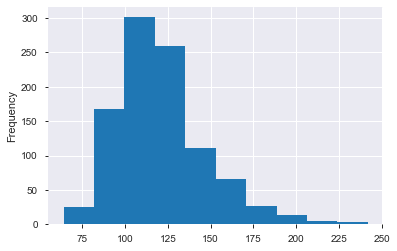

In [252]:
%matplotlib inline
movies.duration.plot(kind = 'hist')

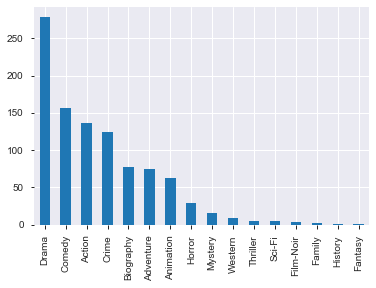

In [253]:
movies.genre.value_counts().plot(kind = 'bar')

### Funciones de agregacion

In [254]:
df1['2005'].agg(['max', 'min', 'mean'])

max     55891.0
min     36658.0
mean    45339.8
Name: 2005, dtype: float64

In [255]:
df1.max()

GEOID     04000US06
State    California
2005          55891
2006          56418
2007          62993
2008          63989
2009          61604
2010          57848
2011          57431
2012          63648
2013          61137
dtype: object

In [256]:
df1.agg(['max', 'min', 'std', 'mean'])

,GEOID,State,2005,2006,2007,2008,2009,2010,2011,2012,2013
max,04000US06,California,55891.000000,56418.000000,62993.000000,63989.000000,61604.00000,57848.000000,57431.000000,63648.000000,61137.000000
min,04000US01,Alabama,36658.000000,37057.000000,40795.000000,39586.000000,36538.00000,38587.000000,41302.000000,39018.000000,39919.000000
std,NaN,NaN,8586.880615,9195.672966,9415.639633,9906.997487,10630.62477,8303.656201,6893.345538,10094.581873,9446.102122
mean,NaN,NaN,45339.800000,46680.600000,49789.800000,50395.800000,47999.00000,47709.400000,48662.200000,50038.800000,50113.400000


In [257]:
df1.std()

2005     8586.880615
2006     9195.672966
2007     9415.639633
2008     9906.997487
2009    10630.624770
2010     8303.656201
2011     6893.345538
2012    10094.581873
2013     9446.102122
dtype: float64

In [258]:
df1.std(axis = 1)

0    2431.817125
1    3218.830188
2    1582.760546
3    1765.581522
4    1905.890678
dtype: float64

In [259]:
df1['Suma Total'] = df1.sum(axis = 1)

In [260]:
df1

,GEOID,State,2005,2006,2007,2008,2009,2010,2011,2012,2013,Suma Total
0,04000US01,Alabama,37150,37952,42212,44476,39980,40933,42590,43464,41381,370138
1,04000US02,Alaska,55891,56418,62993,63989,61604,57848,57431,63648,61137,540959
2,04000US04,Arizona,45245,46657,47215,46914,45739,46896,48621,47044,50602,424933
3,04000US05,Arkansas,36658,37057,40795,39586,36538,38587,41302,39018,39919,349460
4,04000US06,California,51755,55319,55734,57014,56134,54283,53367,57020,57528,498154


In [261]:
df1['2005'].idxmin()

3

In [262]:
df1.loc[df1['2005'].idxmin(),]

GEOID         04000US05
State          Arkansas
2005              36658
2006              37057
2007              40795
2008              39586
2009              36538
2010              38587
2011              41302
2012              39018
2013              39919
Suma Total       349460
Name: 3, dtype: object

In [263]:
df1[df1['2005'] < df1['2005'].max() - 10]

,GEOID,State,2005,2006,2007,2008,2009,2010,2011,2012,2013,Suma Total
0,04000US01,Alabama,37150,37952,42212,44476,39980,40933,42590,43464,41381,370138
2,04000US04,Arizona,45245,46657,47215,46914,45739,46896,48621,47044,50602,424933
3,04000US05,Arkansas,36658,37057,40795,39586,36538,38587,41302,39018,39919,349460
4,04000US06,California,51755,55319,55734,57014,56134,54283,53367,57020,57528,498154


In [264]:
df1

,GEOID,State,2005,2006,2007,2008,2009,2010,2011,2012,2013,Suma Total
0,04000US01,Alabama,37150,37952,42212,44476,39980,40933,42590,43464,41381,370138
1,04000US02,Alaska,55891,56418,62993,63989,61604,57848,57431,63648,61137,540959
2,04000US04,Arizona,45245,46657,47215,46914,45739,46896,48621,47044,50602,424933
3,04000US05,Arkansas,36658,37057,40795,39586,36538,38587,41302,39018,39919,349460
4,04000US06,California,51755,55319,55734,57014,56134,54283,53367,57020,57528,498154


In [265]:
df1.iloc[:,2:]

,2005,2006,2007,2008,2009,2010,2011,2012,2013,Suma Total
0,37150,37952,42212,44476,39980,40933,42590,43464,41381,370138
1,55891,56418,62993,63989,61604,57848,57431,63648,61137,540959
2,45245,46657,47215,46914,45739,46896,48621,47044,50602,424933
3,36658,37057,40795,39586,36538,38587,41302,39018,39919,349460
4,51755,55319,55734,57014,56134,54283,53367,57020,57528,498154


In [266]:
def f(x):
    return x.max()

df1.iloc[:,2:].agg(['sum','max','min', lambda s: s[s>40000].count()])

,2005,2006,2007,2008,2009,2010,2011,2012,2013,Suma Total
sum,226699,233403,248949,251979,239995,238547,243311,250194,250567,2183644
max,55891,56418,62993,63989,61604,57848,57431,63648,61137,540959
min,36658,37057,40795,39586,36538,38587,41302,39018,39919,349460
<lambda>,3,3,5,4,3,4,5,4,4,5


In [267]:
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [268]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [269]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [270]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [271]:
movies.genre.value_counts(normalize = True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

In [272]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [273]:
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [274]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

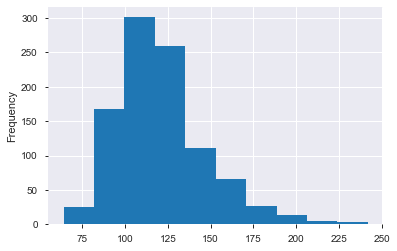

In [275]:
%matplotlib inline
movies.duration.plot(kind = 'hist')

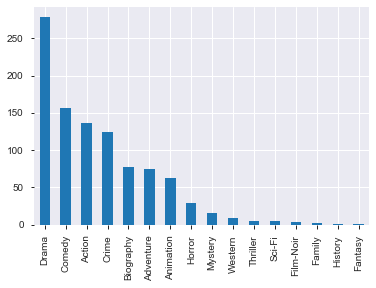

In [276]:
movies.genre.value_counts().plot(kind = 'bar')

# Graficando DataFrames

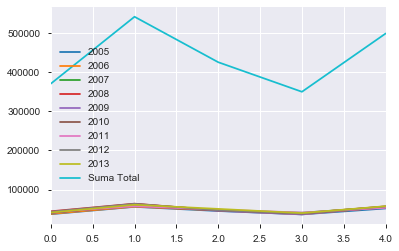

In [277]:
df1.plot()

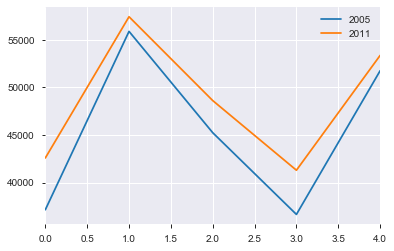

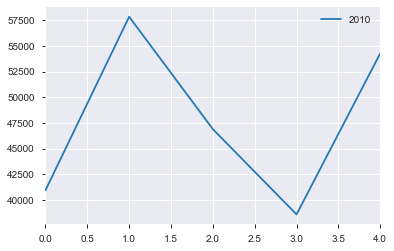

In [540]:
df1[['2005', '2011']].plot()
df1[['2010']].plot()

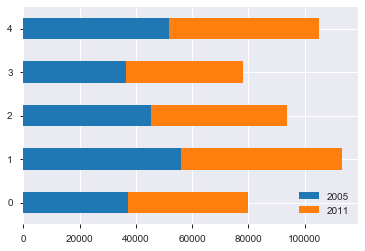

In [541]:
df1[['2005', '2011']].plot(kind = 'barh', stacked = True)

In [542]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
        'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
df4

,a,b,c
0,1.736648,0.704596,-0.922051
1,2.175512,-0.748115,-1.092558
2,-0.006425,0.057797,-2.692641
3,1.794792,-0.489174,-3.126457
4,0.954096,-0.574286,-0.781380
...,...,...,...
995,-0.583314,-0.622068,-1.616189
996,-0.012560,-0.099098,-0.585783
997,1.786772,-1.254128,-2.280562
998,1.270368,0.687038,-0.699154


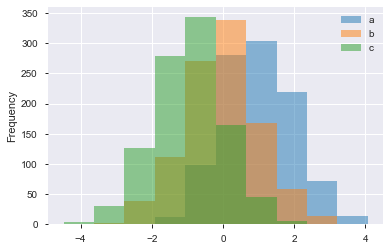

In [543]:
df4.plot(kind='hist', alpha=0.5)

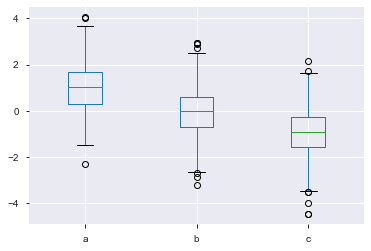

In [544]:
df4.plot(kind='box')

In [545]:
df5 = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])


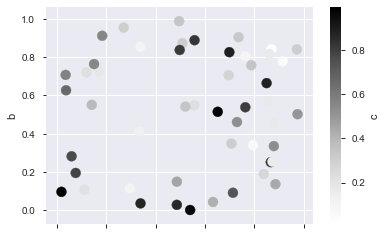

In [546]:
df5.plot(kind='scatter', x='a', y='b', c = 'c', s = 100);

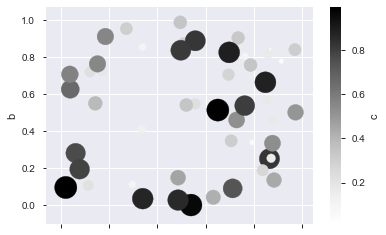

In [547]:
df5.plot(kind='scatter', x='a', y='b', c = 'c', s = df5['c']*500)